In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
x_train = np.array(df["area"])
y_train = np.array(df["price"])

m = len(x_train)

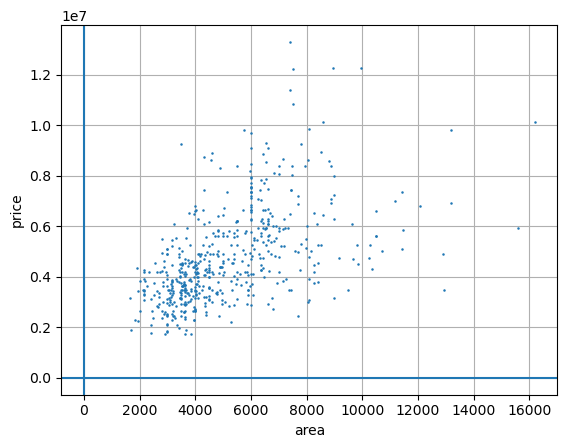

In [5]:
plt.plot(x_train,y_train,"o",ms = 0.8)
plt.grid()
plt.axvline(x=0)
plt.axhline(y=0)
plt.xlabel("area")
plt.ylabel("price")
plt.show()

## zscore normalize

In [6]:
x_avg = np.mean(x_train)
y_avg = np.mean(y_train)

x_std = np.std(x_train)
y_std = np.std(y_train)

x = (x_train - x_avg)/x_std
y = (y_train - y_avg)/y_std

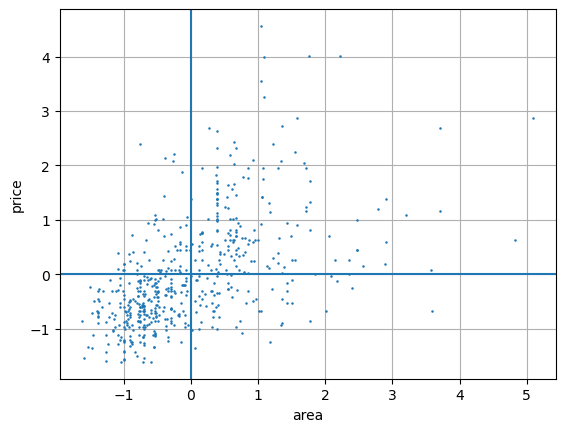

In [7]:
plt.plot(x,y,"o",ms = 0.8)

plt.grid()
plt.axhline(y =0)
plt.axvline(x =0)

plt.ylabel("price")
plt.xlabel("area")
plt.show()

In [12]:
#initial approximation
w = 1
b = 1

## Cost function

In [8]:
def cost(x,y,w,b):
    
    c = np.sum((w*x+b - y)**2) / 2*m
    return c

## Gradient decent

In [13]:
def gradient_descent(w,b,lr,n):
    
    c = []
    
    for _ in range(n):
        f = w * x + b
        
        g_w = 1/m * np.sum((f - y)*x)
        g_b = 1/m * np.sum(f - y)
        
        w = w - lr * g_w
        b = b - lr * g_b
        
        c.append(cost(x,y,w,b))
        
    return w,b,c

In [15]:
w,b,c = gradient_descent(1,1,0.001,10000)

print(w,b)
print(c[0],c[-1])

0.5360183063305138 4.517334597732267e-05
285972.0948312689 105845.8757337236


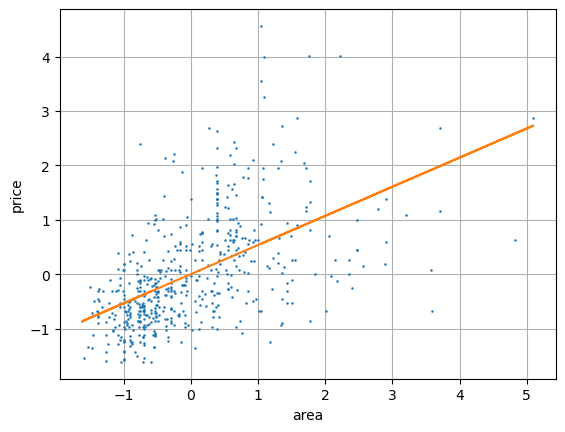

In [16]:
plt.plot(x,y,"o",ms = 0.8)
f = w*x+b
plt.plot(x,f)

plt.grid()
plt.ylabel("price")
plt.xlabel("area")

plt.show()

## Multiple linear regression

In [18]:
x_features = ["area","bedrooms","bathrooms","stories","parking"]

n = len(x_features)

x_train = df[x_features].values
y_train = df["price"].values

m = y.size

x_train

array([[7420,    4,    2,    3,    2],
       [8960,    4,    4,    4,    3],
       [9960,    3,    2,    2,    2],
       ...,
       [3620,    2,    1,    1,    0],
       [2910,    3,    1,    1,    0],
       [3850,    3,    1,    2,    0]], dtype=int64)

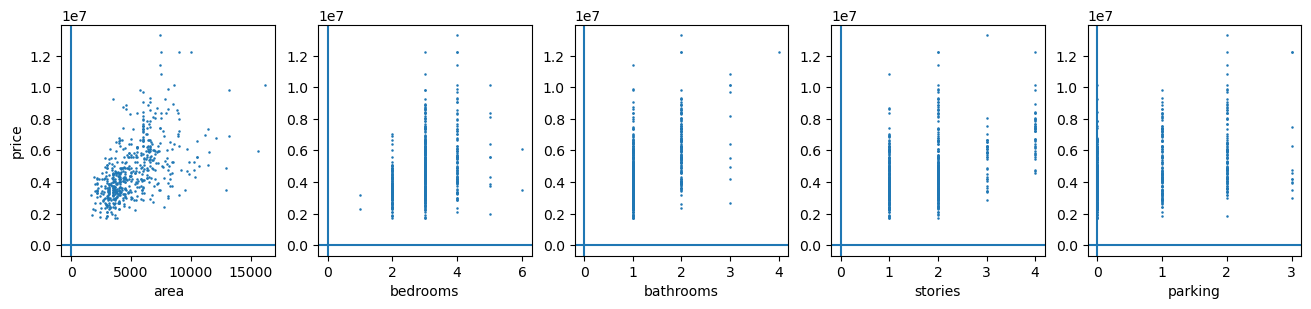

In [27]:
fig , ax = plt.subplots(1,n , figsize = (16,3))

for i in range(n):
    ax[i].plot(x_train[:,i],y_train,"o",ms=0.8)
    ax[i].set_xlabel(x_features[i])
    
    ax[i].axvline(x=0)
    ax[i].axhline(y=0)
    
ax[0].set_ylabel("price")
plt.show()

### zscore normalized

In [24]:
x_avg = np.mean(x_train,axis = 0)
x_std = np.std(x_train, axis = 0)

y_avg = np.mean(y_train)
y_std = np.std(y_train)

x = (x_train - x_avg)/x_std
y = (y_train - y_avg)/y_std


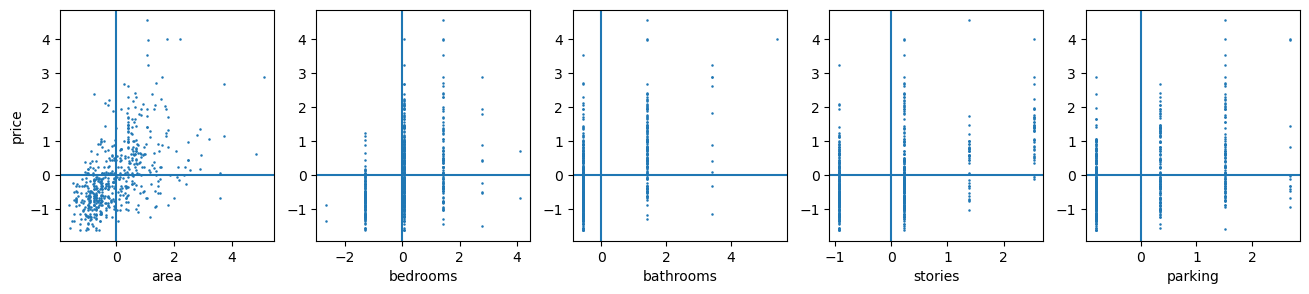

In [26]:
fig , ax = plt.subplots(1,n , figsize = (16,3))

for i in range(n):
    ax[i].plot(x[:,i],y,"o",ms=0.8)
    ax[i].set_xlabel(x_features[i])
    
    ax[i].axvline(x=0)
    ax[i].axhline(y=0)
    
ax[0].set_ylabel("price")
plt.show()

### Gradient descent

In [41]:
def gradient(x,y,w,b,m,lr= 0.001,max_iter = 1000):
    
    c = []
    
    for i in range(max_iter):
        
        f = np.dot(x,w)+b
        
        g_w = np.dot(x.T,(f-y))/m
        g_b = np.sum(f-y)/m
        
        w = w - lr*g_w
        b = b - lr*g_b

        c.append((1/(2*m))*np.sum((f-y)**2))

    return w,b,c
    

In [42]:
w,b,c = gradient(x,y,[1,1,1,1,1],1,m)

print(w,b)
print(c[0],c[-1])

[0.44962063 0.23267226 0.34370781 0.36463011 0.36436706] 0.36769542477096406
3.5284838123844273 0.3533979176027744


# Scikit learn

In [43]:
import sklearn.linear_model as lm

In [47]:
x_train = np.array(df["area"])
y_train = np.array(df["price"])

x_reshaped = x_train.reshape(-1,1)

In [51]:
reg = lm.LinearRegression()
reg.fit(x_reshaped,y_train)

LinearRegression()